# <font color=red>Task # 3 - To Explore Unsupervised Machine Learning</font>

<br>
<br>

### <font color=blue>Project Statement : </font>
#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

<br>
<br>

### Importing Necessary Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 


### importing the dataset & viewing first 10 rows

In [44]:
df = pd.read_csv('iris.csv')
df.head(11)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Dropping the 'Id' column from the dataset

In [45]:
df.drop(['Id'], axis = 1,inplace=True)

### Checking the shape of the dataset

In [46]:
df.shape

(150, 5)

### Information of the dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Exploring the dataset

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


### checking the correlation between each column

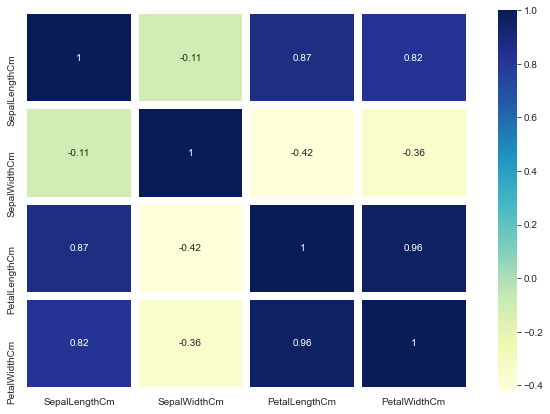

In [49]:
plt.figure(figsize=(10,7))
cor = df.corr()
sns.heatmap(cor,annot=True,linewidth=7,cmap="YlGnBu")
plt.show()

### Distribution plot

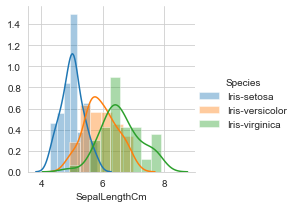

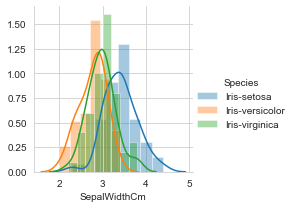

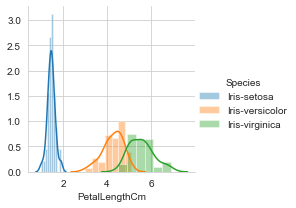

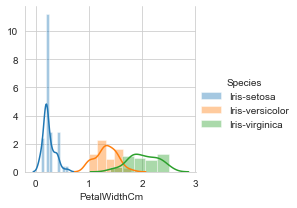

In [67]:

sns.FacetGrid(df,hue="Species").map(sns.distplot,"SepalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species").map(sns.distplot,"SepalWidthCm").add_legend()
sns.FacetGrid(df,hue="Species").map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species").map(sns.distplot,"PetalWidthCm").add_legend()
plt.show()

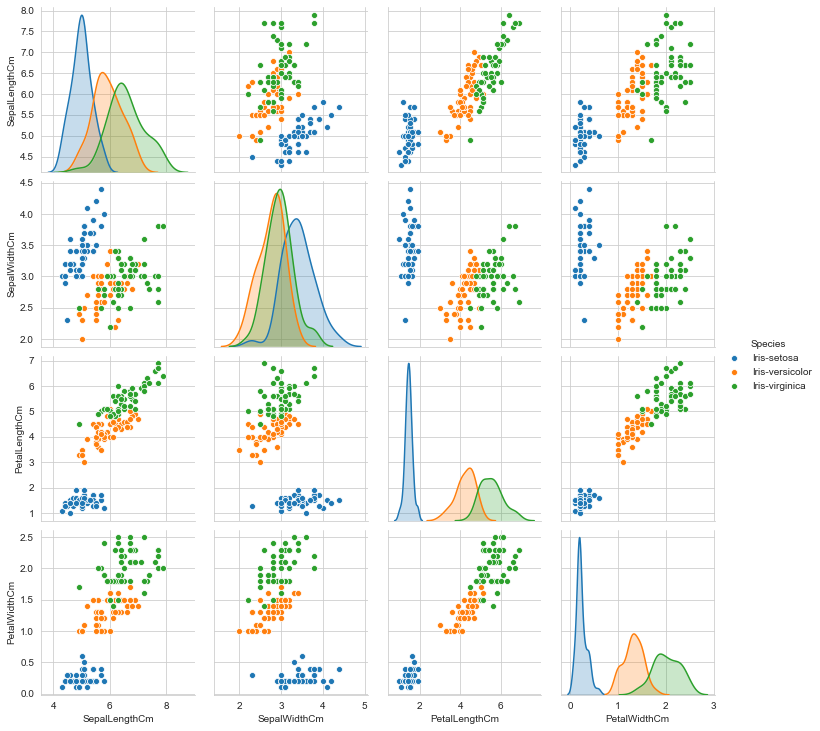

In [51]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Species");
plt.show()

### Finding the optimum number of clusters for k-means classification

In [54]:
from sklearn.cluster import KMeans
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Using the elbow method to determine the optimal number of clusters for k-means clustering

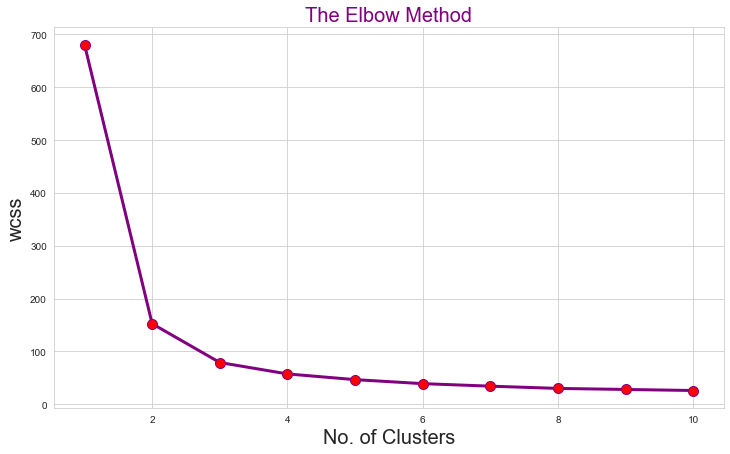

In [61]:
plt.figure(figsize=(12,7))
plt.plot(range(1, 11), wcss, color='purple',lw=3, marker='o', markersize=10, markerfacecolor="red")
plt.title('The Elbow Method', fontsize = 20, c='purple')
plt.xlabel('No. of Clusters',fontsize=20)
plt.ylabel('wcss',fontsize=20)
plt.show()

### Applying kmeans to the dataset / Creating the kmeans classifier

In [62]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising the clusters - On the first two columns

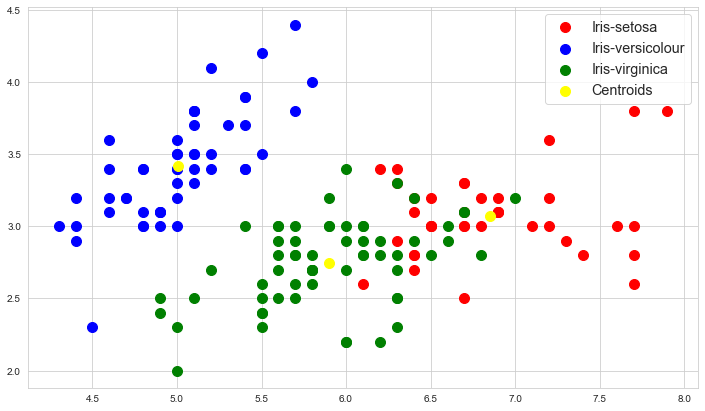

In [65]:

plt.figure(figsize=(12,7))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend(fontsize='x-large')

### 3d scatterplot using matplotlib

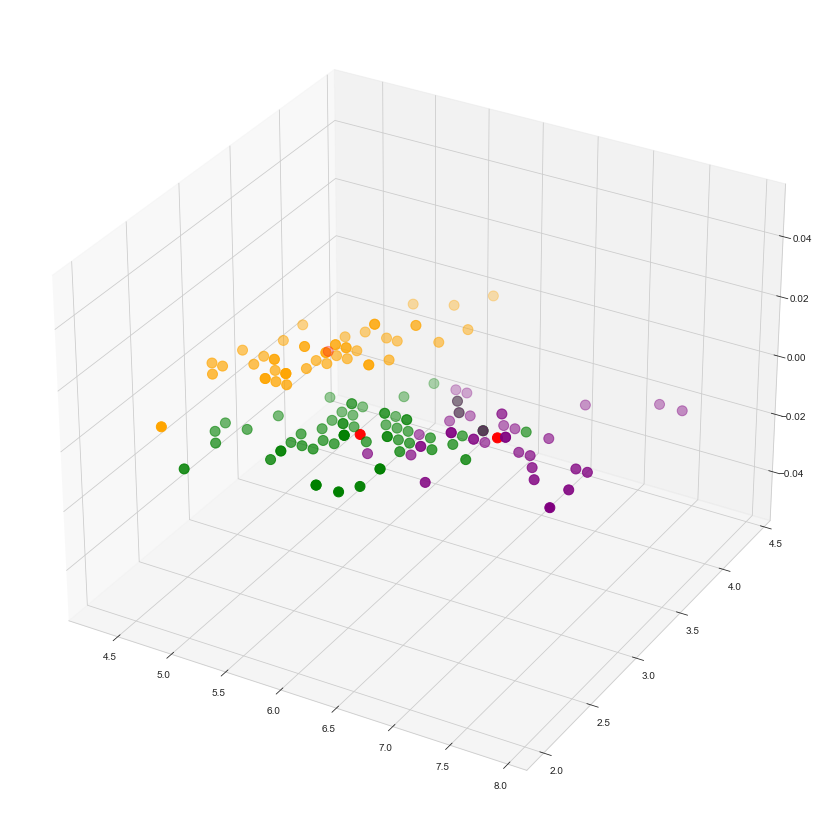

In [66]:

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()